In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import sequential

ModuleNotFoundError: No module named 'tensorflow.keras'

In [2]:
#loading data directly from tensorflow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

ModuleNotFoundError: No module named 'keras.api'

In [3]:
x_train.shape

(50000, 32, 32, 3)

Here, there are a total of 50,000 images in training data with pixel size of 32*32 and 3 colour channels (RGB)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
x_train[500].shape #for 1 invidual image at 500 index

(32, 32, 3)

In [8]:
type(x_train)

numpy.ndarray

CLasses of our data:
    beaver, dolphin, otter, seal, whale
	aquarium fish, flatfish, ray, shark, trout
	orchids, poppies, roses, sunflowers, tulips
    containers	bottles, bowls, cans, cups, plates
	apples, mushrooms, oranges, pears, sweet peppers
	clock, computer keyboard, lamp, telephone, television
    bed, chair, couch, table, wardrobe
	bee, beetle, butterfly, caterpillar, cockroach
	bear, leopard, lion, tiger, wolf
	bridge, castle, house, road, skyscraper
	cloud, forest, mountain, plain, sea
	camel, cattle, chimpanzee, elephant, kangaroo
	fox, porcupine, possum, raccoon, skunk
	crab, lobster, snail, spider, worm
	baby, boy, girl, man, woman
	crocodile, dinosaur, lizard, snake, turtle
	hamster, mouse, rabbit, shrew, squirrel
	maple, oak, palm, pine, willow
	bicycle, bus, motorcycle, pickup truck, train
	lawn-mower, rocket, streetcar, tank, tractor


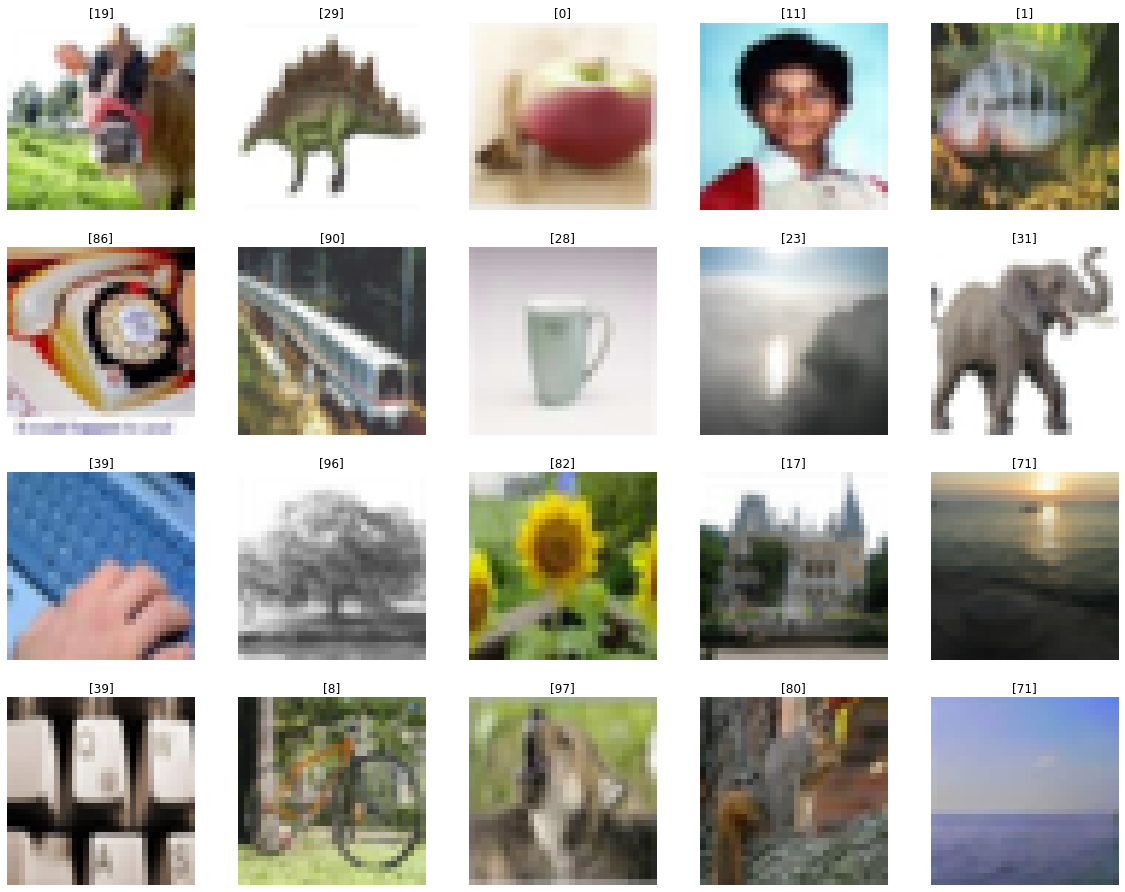

In [9]:
fig = plt.figure( figsize = (20,20))
for i in range(20):
    r = 5
    c = 5
    #print(i)
    #fig.add_subplot(2,3,i+1)
    fig.add_subplot(r,c,i+1)
    #print(i)
    plt.imshow((x_train[i]))
    plt.axis('off')
    #plt.set(tittle= y_train[i])
    plt.title(f"{y_train[i]}")

In [10]:
#one hot encoding i.e getting our labels in form of 0 and 1 with 100 different combination of 0 and 1,
# i.e one combination for each class

y_train_after_cat = tf.keras.utils.to_categorical(y_train, 100)
y_test_after_cat = tf.keras.utils.to_categorical(y_test,100)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [12]:
models = Sequential()

#input layers start
models.add(Conv2D(filters=32, kernel_size = (3,3), input_shape = (32,32,3), padding = 'same',
                  activation = 'relu'))

models.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'))

models.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = "relu"))

models.add(MaxPool2D(pool_size = (2,2) ))

models.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same", activation = "relu"))

models.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same", activation = "relu"))

models.add (MaxPool2D(pool_size = (2,2)))

models.add(Flatten())

models.add(Dense(255, activation = 'relu'))

#end of input layer and start of output layer

models.add(Dense(100, activation = 'softmax'))

models.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [13]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                        

Creting callbacks

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_accuracy', patience = 3)

In [16]:
models.fit(x_train, y_train_after_cat,
           epochs=15, validation_data=(x_test, y_test_after_cat), callbacks=[early_stopping])

Epoch 1/15
1563/1563 [==============================] - 372s 238ms/step - loss: 3.8652 - accuracy: 0.1254 - val_loss: 3.3656 - val_accuracy: 0.1997
Epoch 2/15
1563/1563 [==============================] - 381s 244ms/step - loss: 3.0206 - accuracy: 0.2612 - val_loss: 2.9350 - val_accuracy: 0.2785
Epoch 3/15
1563/1563 [==============================] - 381s 244ms/step - loss: 2.6333 - accuracy: 0.3374 - val_loss: 2.7648 - val_accuracy: 0.3168
Epoch 4/15
1563/1563 [==============================] - 370s 237ms/step - loss: 2.3524 - accuracy: 0.3908 - val_loss: 2.7155 - val_accuracy: 0.3381
Epoch 5/15
1563/1563 [==============================] - 420s 268ms/step - loss: 2.0977 - accuracy: 0.4468 - val_loss: 2.6958 - val_accuracy: 0.3439
Epoch 6/15
1563/1563 [==============================] - 402s 257ms/step - loss: 1.8746 - accuracy: 0.4965 - val_loss: 2.8566 - val_accuracy: 0.3355
Epoch 7/15
1563/1563 [==============================] - 431s 276ms/step - loss: 1.6607 - accuracy: 0.5496 - val_

In [18]:
models.save('cifar100_cnn.h5')

In [22]:
import tensorflow as tf
model_saved = tf.keras.models.load_model('cifar100_cnn.h5')

In [23]:
model_saved

In [29]:
import pandas as pd
metrics = pd.DataFrame(models.history.history)

In [30]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,3.865194,0.12536,3.365578,0.1997
1,3.020553,0.26124,2.934959,0.2785
2,2.633338,0.33740,2.764762,0.3168
3,2.352377,0.39078,2.715524,0.3381
4,2.097722,0.44680,2.695794,0.3439
5,1.874556,0.49654,2.856614,0.3355
6,1.660717,0.54960,2.990503,0.3339
7,1.466245,0.59256,3.035392,0.3307


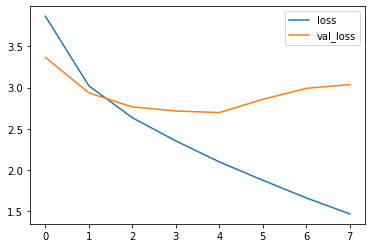

In [36]:
metrics[['loss','val_loss']].plot();

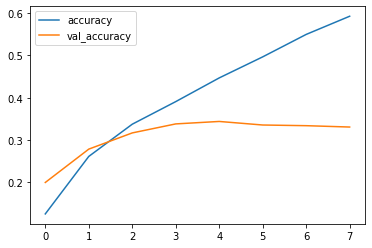

In [35]:
metrics[['accuracy','val_accuracy']].plot();

In [37]:
models.evaluate(x_test,y_test_after_cat)

313/313 [==============================] - 17s 53ms/step - loss: 3.0354 - accuracy: 0.3307


[3.0353920459747314, 0.33070001006126404]

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
model_prediction = models.predict(x_test)
len(model_prediction)

313/313 [==============================] - 16s 51ms/step


10000

In [48]:
model_prediction
len(model_prediction)

10000

In [53]:
pred = [np.argmax(x, axis=0) for x in model_prediction]
len(pred)

10000

In [59]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       100
           1       0.30      0.46      0.37       100
           2       0.19      0.27      0.22       100
           3       0.24      0.17      0.20       100
           4       0.21      0.08      0.12       100
           5       0.26      0.29      0.27       100
           6       0.30      0.37      0.33       100
           7       0.34      0.36      0.35       100
           8       0.59      0.33      0.42       100
           9       0.55      0.46      0.50       100
          10       0.28      0.30      0.29       100
          11       0.23      0.18      0.20       100
          12       0.29      0.41      0.34       100
          13       0.44      0.15      0.22       100
          14       0.24      0.31      0.27       100
          15       0.33      0.22      0.27       100
          16       0.35      0.36      0.35       100
          17       0.51    

In [77]:
con = confusion_matrix(y_test, pred)
type(con)
con
#len(con[0])

array([[56,  5,  1, ...,  0,  0,  0],
       [ 1, 46,  1, ...,  0,  1,  1],
       [ 3,  3, 27, ...,  1,  4,  3],
       ...,
       [ 0,  0,  3, ..., 30,  2,  0],
       [ 0,  1,  5, ...,  3, 25,  1],
       [ 0,  0,  4, ...,  0,  0, 34]], dtype=int64)

In [76]:
con[0]

array([56,  5,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  4,  2,  0,  0,  4,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,
        0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [66]:
import seaborn as sns

<AxesSubplot:>

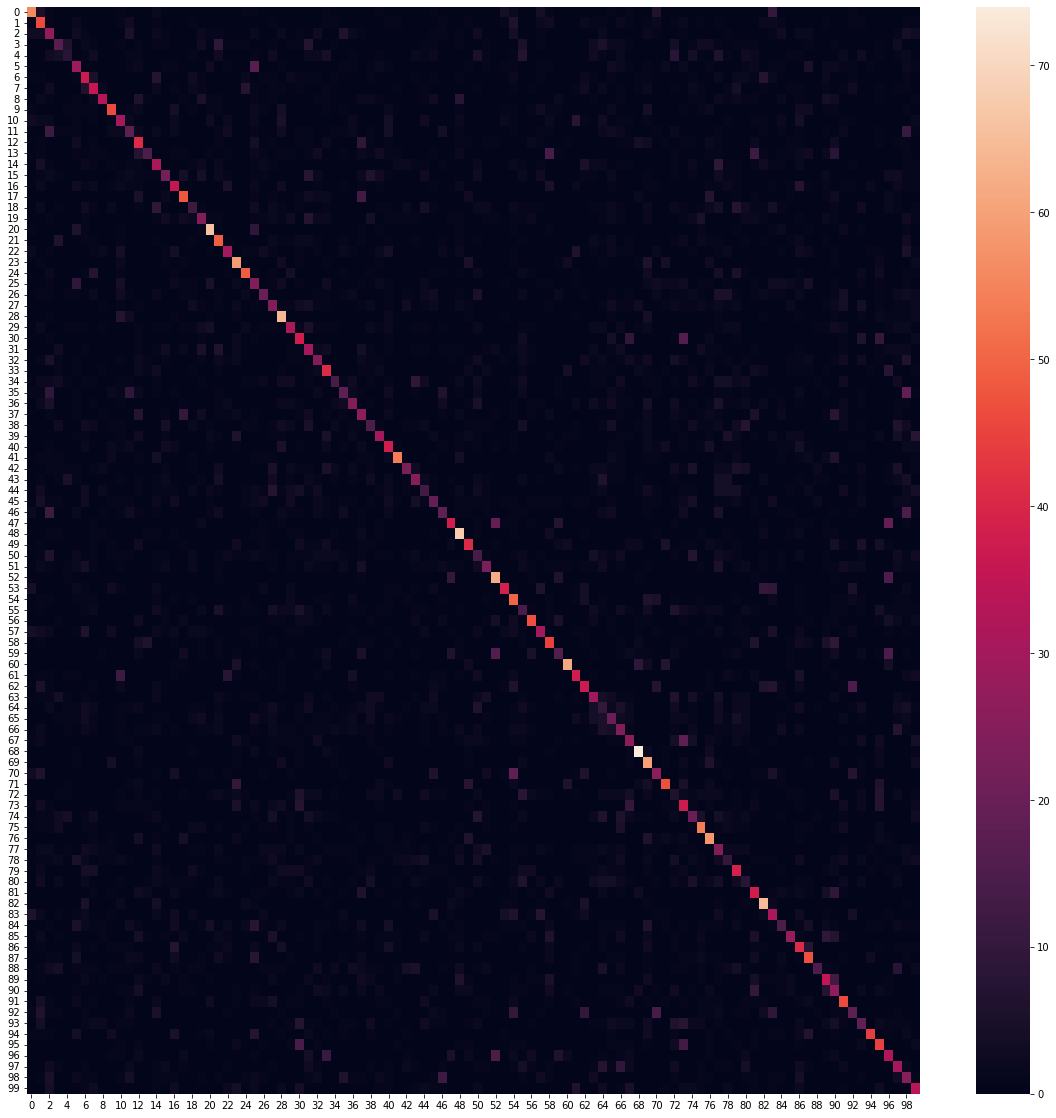

In [75]:
plt.figure(figsize=(20,20));
sns.heatmap(con)

### lets see this information of prediction on csv file

In [43]:
unique_name = np.unique(y_train)

In [44]:
unique_name

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [56]:
#preds_df = pd.DataFrame(columns=["id"] + list(unique_name))
#preds_df.head()
predi_csv = pd.DataFrame( list(unique_name))

In [57]:
predi_csv

,0
0,0
1,1
2,2
3,3
4,4
...,...
95,95
96,96
97,97
98,98


In [47]:
predi_csv[list(unique_name)] = model_prediction

ValueError: Length of values (10000) does not match length of index (100)